In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_train = pd.read_csv('F:/Social Prachar/FB.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100
1,2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100
2,2020-07-29,231.139999,233.699997,230.309998,233.289993,233.289993,13588300
3,2020-07-30,230.220001,234.889999,229.000000,234.500000,234.500000,20615300
4,2020-07-31,255.820007,255.850006,249.000000,253.669998,253.669998,53005100


In [4]:
training_set = dataset_train.iloc[:, 1:2].values
training_set.shape

(251, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.00948815],
       [0.033744  ],
       [0.00703954],
       [0.        ],
       [0.19588343],
       [0.17162746],
       [0.16328714],
       [0.15280435],
       [0.14400483],
       [0.25908627],
       [0.28938715],
       [0.2293213 ],
       [0.21998622],
       [0.23972749],
       [0.24554286],
       [0.2469967 ],
       [0.23513666],
       [0.23850343],
       [0.239345  ],
       [0.2943607 ],
       [0.31257177],
       [0.32282502],
       [0.41150813],
       [0.53515955],
       [0.49567677],
       [0.48764259],
       [0.49345771],
       [0.52536539],
       [0.50325187],
       [0.43637614],
       [0.31417857],
       [0.3485346 ],
       [0.34654532],
       [0.30484349],
       [0.31165361],
       [0.30951114],
       [0.28364838],
       [0.21470654],
       [0.2156247 ],
       [0.13252729],
       [0.17667761],
       [0.19159839],
       [0.12456958],
       [0.14675945],
       [0.2232764 ],
       [0.21111023],
       [0.2430179 ],
       [0.268

In [17]:
training_set_scaled.shape

(251, 1)

In [18]:
a=training_set_scaled[0:10,0]
np.array(a).shape

(10,)

In [19]:
training_set_scaled[10,0]

0.28938715381313473

In [20]:
X_train = []
y_train = []

In [21]:
for i in range(10, 251):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
X_train.shape

(241, 10)

In [23]:
y_train.shape

(241,)

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [25]:
X_train.shape

(241, 10, 1)

In [26]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [63]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.2))

In [99]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

In [100]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
8/8 [==============================] - 6s 19ms/step - loss: 0.6862 - accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 18ms/step - loss: 0.4325 - accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 16ms/step - loss: 0.3069 - accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 16ms/step - loss: 0.2124 - accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 16ms/step - loss: 0.1382 - accuracy: 0.0000e+00
Epoch 6/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0835 - accuracy: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0663 - accuracy: 0.0041
Epoch 8/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0691 - accuracy: 0.0000e+00
Epoch 9/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0637 - accuracy: 0.0000e+00
Epoch 10/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0627 - accu

8/8 [==============================] - 0s 17ms/step - loss: 0.0144 - accuracy: 0.0041
Epoch 83/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0164 - accuracy: 0.0041
Epoch 84/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0141 - accuracy: 0.0041
Epoch 85/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0156 - accuracy: 0.0041
Epoch 86/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0132 - accuracy: 0.0041
Epoch 87/100
8/8 [==============================] - 0s 18ms/step - loss: 0.0150 - accuracy: 0.0041
Epoch 88/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0119 - accuracy: 0.0041
Epoch 89/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0149 - accuracy: 0.0041
Epoch 90/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0142 - accuracy: 0.0041
Epoch 91/100
8/8 [==============================] - 0s 18ms/step - loss: 0.0154 - accuracy: 0.0041
Epoch 92/100
8/8 [=====

In [102]:
dataset_test = pd.read_csv('F:/Social Prachar/FB.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

real_stock_price.shape

(251, 1)

In [103]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [104]:
inputs.shape

(261, 1)

In [105]:
X_test = []

In [106]:
for i in range(10, 261):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

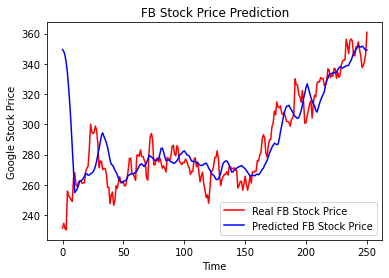

In [107]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real FB Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted FB Stock Price')
plt.title('FB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [110]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20, 60):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price


array([[353.44708],
       [338.47983],
       [321.37854],
       [303.07684],
       [286.41257],
       [271.98267],
       [260.12985],
       [249.3854 ],
       [239.53761],
       [230.63109],
       [222.76036],
       [224.12703],
       [225.51833],
       [227.43567],
       [229.78323],
       [230.26558],
       [231.21729],
       [232.54126],
       [234.33667],
       [236.65517],
       [237.92772],
       [239.20732],
       [241.63882],
       [244.5446 ],
       [247.45943],
       [250.47914],
       [253.57518],
       [256.85428],
       [259.972  ],
       [262.84464],
       [264.41583],
       [265.23767],
       [265.4117 ],
       [263.52533],
       [259.1814 ],
       [255.4596 ],
       [251.7936 ],
       [247.99428],
       [243.74234],
       [239.93742]], dtype=float32)